### 1. Interpretation and significance
Suppose that we would like to know how much families in the US are spending on recreation annually. We've estimated the following model:

𝑒𝑥𝑝𝑒𝑛𝑑𝑖𝑡𝑢𝑟𝑒=873+0.0012𝑎𝑛𝑛𝑢𝑎𝑙_𝑖𝑛𝑐𝑜𝑚𝑒+0.00002𝑎𝑛𝑛𝑢𝑎𝑙_𝑖𝑛𝑐𝑜𝑚𝑒2−223.57ℎ𝑎𝑣𝑒_𝑘𝑖𝑑𝑠
expenditure is the annual spending on recreation in US dollars, annual_income is the annual income in US dollars, and have_kids is a dummy variable indicating the families with children. Interpret the estimated coefficients. What additional statistics should be given in order to make sure that your interpretations make sense statistically. Write up your answer.

#### We can say that having kids is reducing the recreation expenditure by 223.57 USD compared to the family without kids. If we have a variable with number of kids we can estimate the expenditure better, because we can estimate how much of the expenditure is decreasing with number of kids. 

### 2. Weather model
In this exercise, you'll work with the historical temperature data from the previous checkpoint. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

First, load the dataset from the weatherinszeged table from Thinkful's database.
Build a linear regression model where your target variable is the difference between the apparenttemperature and the temperature. As explanatory variables, use humidity and windspeed. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables?
Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for humidity and windspeed change? Interpret the estimated coefficients.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings(action = "ignore")

In [4]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine("postgresql://{}:{}@{}:{}/{}".format(postgres_user, postgres_pw, postgres_host,
                                                            postgres_port, postgres_db))
weatherinszeged_df = pd.read_sql_query('select * from weatherinszeged', con = engine)
engine.dispose()

In [5]:
weatherinszeged_df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [6]:
y = weatherinszeged_df['apparenttemperature']- weatherinszeged_df['temperature']

In [11]:
X = weatherinszeged_df[['humidity', 'windspeed']]

In [12]:
X = sm.add_constant(X)

In [13]:
results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:31:20   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All of the estimated coefficients are statistically significant
With 1 unit increase in Diff in temperature, humidity decreases in 3.03 units
With 1 unit increase in Diff in temperature, windspeed decreases by 0.12 units

In [17]:
weatherinszeged_df['hw'] = weatherinszeged_df['humidity']*weatherinszeged_df['windspeed']

In [19]:
X = weatherinszeged_df[['humidity', 'windspeed', 'hw']]
X = sm.add_constant(X)
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:02:39   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0839      0.033      2.511      0.012       0.018       0.149
humidity       0.1775      0.043      4.133      0.000       0.093       0.262
windspeed      0.0905      0.002     36.797      0.000       0.086       0.095
hw            -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficients are still statistically significant, however, the signs of Humidity and windspeed have changed. With increase in Difference in temperature, humidity and windspeed are also increasing. The interaction variable is decreasing with increase in temperature

### 3. House prices model
In this exercise, you'll interpret your house prices model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

Load the houseprices data from Thinkful's database.
Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?
Now, exclude the insignificant features from your model. Did anything change?
Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have a more prominent effect on house prices?
Do the results sound reasonable to you? If not, try to explain the potential reasons.

In [25]:
from sqlalchemy import create_engine
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine("postgresql://{}:{}@{}:{}/{}".format(postgres_user, postgres_pw, postgres_host, 
                                                             postgres_port, postgres_db))
houseprices_df = pd.read_sql_query('select * from houseprices', con = engine)
engine.dispose()

In [26]:
houseprices_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [43]:
nonnumeric_data = houseprices_df.select_dtypes(['object']).columns

In [45]:
print(nonnumeric_data)
print("The number of non numeric columns are: {}".format(len(nonnumeric_columns)))

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')
The number of non numeric columns are: 1460


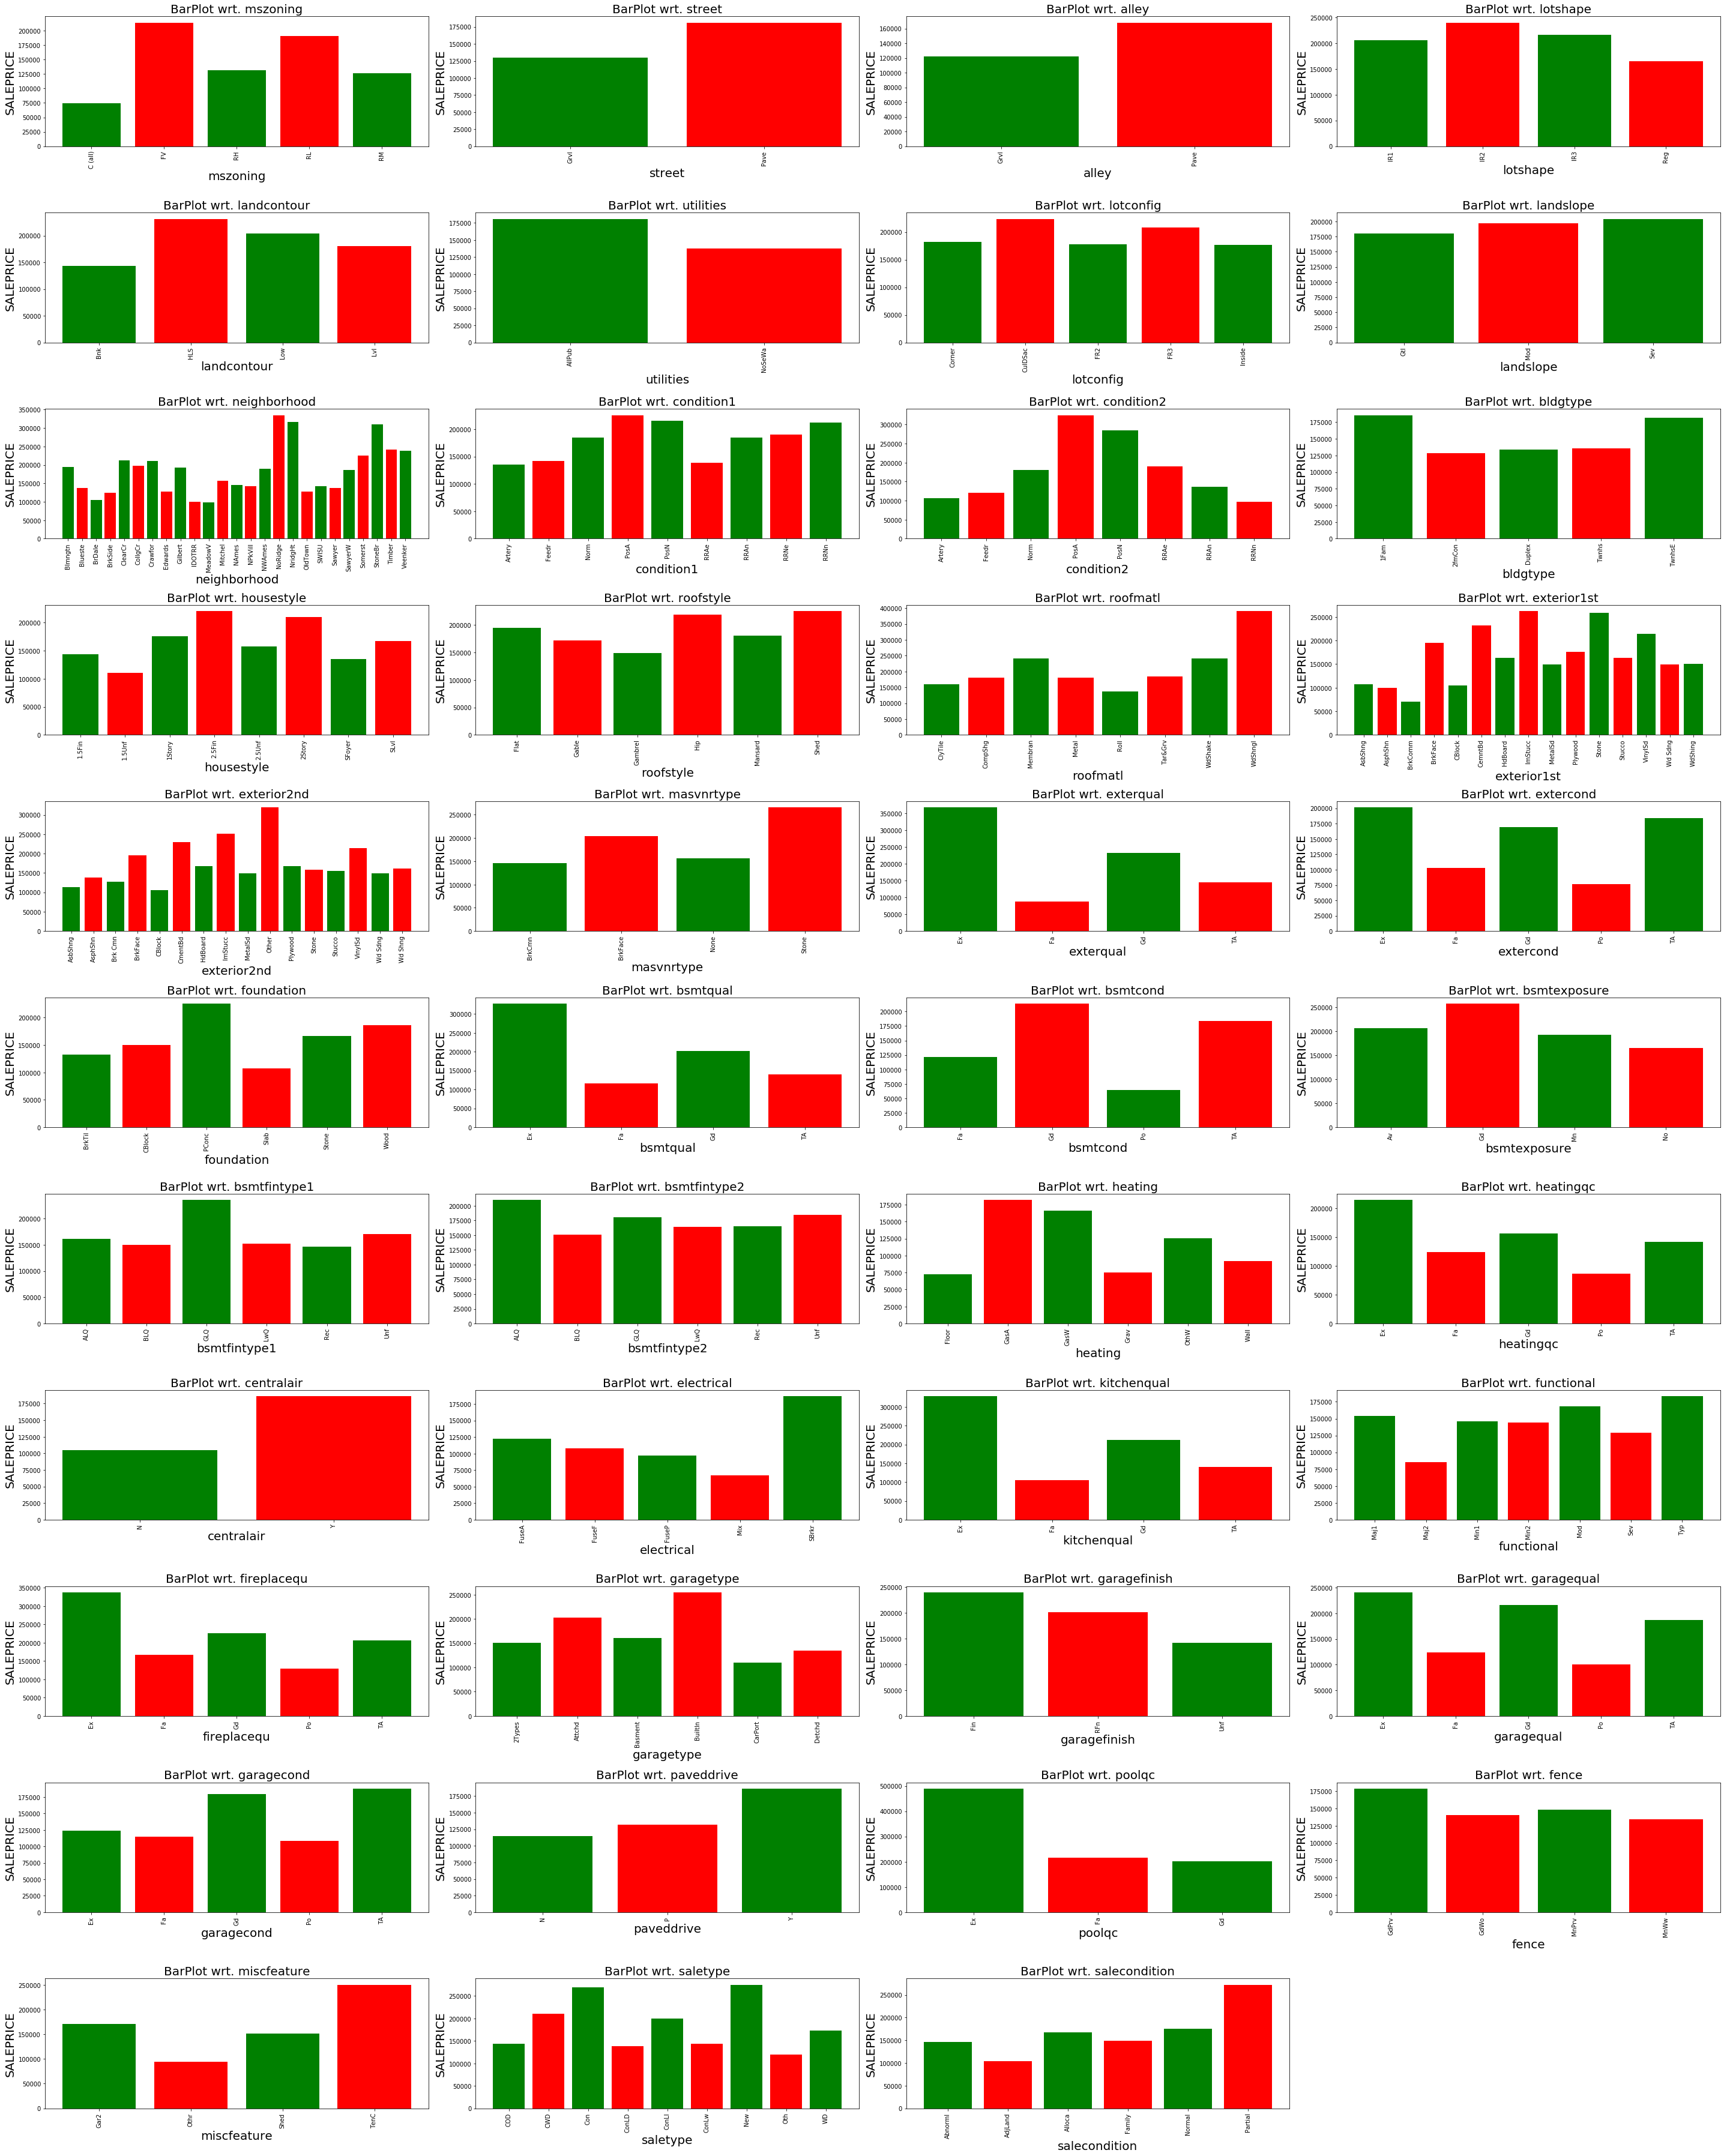

In [51]:
## Plotting bar plots for categorical variables
plt.figure(figsize= (40, 50))
for index, column in enumerate(nonnumeric_data):
    plt.subplot(11,4, index+1)
    plt.bar(houseprices_df.groupby(column)['saleprice'].mean().index, 
            houseprices_df.groupby(column)['saleprice'].mean(), color = ('green', 'red'))
    plt.title("BarPlot wrt. {}".format(column), fontsize = 20)
    plt.xlabel(column, fontsize = 20)
    plt.ylabel("SALEPRICE", fontsize = 20)
    plt.xticks(rotation = 'vertical')
plt.tight_layout()

In [48]:
np.abs(houseprices_df.iloc[:, 1:].corr().loc[:, 'saleprice'].sort_values(ascending = False))

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
screenporch      0.111447
poolarea         0.092404
mosold           0.046432
threessnporch    0.044584
bsmtfinsf2       0.011378
bsmthalfbath     0.016844
miscval          0.021190
lowqualfinsf     0.025606
yrsold           0.028923
overallcond      0.077856
mssubclass       0.084284
enclosedporch    0.128578
kitchenabvgr     0.135907
Name: saleprice, dtype: float64

In [50]:
houseprices_df1 = houseprices_df.copy()

In [59]:
houseprices_df = pd.concat([houseprices_df, pd.get_dummies(houseprices_df.mszoning, prefix = 'mszoning', 
                                                           drop_first = True)], axis =1)
houseprices_df = pd.concat([houseprices_df, pd.get_dummies(houseprices_df.street, prefix = 'street',
                                                          drop_first = True)], axis =1)
dummy_column_names = list(pd.get_dummies(houseprices_df.mszoning, prefix = 'mszoning', drop_first = True).columns)
dummy_column_names = dummy_column_names+list(pd.get_dummies(houseprices_df.street, prefix = 'street',
                                                            drop_first = True).columns)

In [63]:
Y = houseprices_df['saleprice']
X = houseprices_df[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'firstflrsf']+dummy_column_names]
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     481.9
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:11:01   Log-Likelihood:                -17475.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1449   BIC:                         3.503e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.169e+05    1.8e+04     -6.481      0.000   -1.52e+05   -8.15e+04
overallqual  2.347e+04   1097.221     21.392      0.000    2.13e+04    2.56e+04
grlivarea      44.4589      2.654     16.754      0.000      39.254      49.664
garagecars   1.706e+04   1747.450      9.761      0.000    1.36e+04    2.05e+04
totalbsmtsf    24.7058      4.246      5.819      0.000      16.377      33.034
firstflrsf      7.5045      5.040      1.489      0.137      -2.381      17.391
mszoning_FV  6158.5478   3421.607      1.800      0.072    -553.286    1.29e+04
mszoning_FV  6158.5478   3421.607      1.800      0.072    -553.286    1.29e+04
mszoning_FV  6158.5478   3421.607      1.800      0.072    -553.286    1.29e+04
mszoning_FV  6158.5478   3421.607      1.800      0.072    -553.286    1.29e+04
mszoning_RH  2917.4453   3962.973      0.736      0.462   -4856.332    1.07e+04
mszoning_RH  2917.4453   3962.973      0.736      0.462   -4856.332    1.07e+04
mszoning_RH  2917.4453   3962.973      0.736      0.462   -4856.332    1.07e+04
mszoning_RH  2917.4453   3962.973      0.736      0.462   -4856.332    1.07e+04
mszoning_RL  6607.1838   3181.582      2.077      0.038     366.185    1.28e+04
mszoning_RL  6607.1838   3181.582      2.077      0.038     366.185    1.28e+04
mszoning_RL  6607.1838   3181.582      2.077      0.038     366.185    1.28e+04
mszoning_RL  6607.1838   3181.582      2.077      0.038     366.185    1.28e+04
mszoning_RM  1818.9580   3218.663      0.565      0.572   -4494.779    8132.695
mszoning_RM  1818.9580   3218.663      0.565      0.572   -4494.779    8132.695
mszoning_RM  1818.9580   3218.663      0.565      0.572   -4494.779    8132.695
mszoning_RM  1818.9580   3218.663      0.565      0.572   -4494.779    8132.695
street_Pave  -299.5521   5422.901     -0.055      0.956   -1.09e+04    1.03e+04
street_Pave  -299.5521   5422.901     -0.055      0.956   -1.09e+04    1.03e+04
street_Pave  -299.5521   5422.901     -0.055      0.956   -1.09e+04    1.03e+04
==============================================================================
Omnibus:                      405.241   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37144.148
Skew:                          -0.047   Prob(JB):                         0.00
Kurtosis:                      27.710   Cond. No.                     3.06e+52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.11e-96. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [67]:
## Removing insignificant variables to get a better model
y = houseprices_df['saleprice']
X = houseprices_df[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'mszoning_RL']]
X = sm.add_constant(X)
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     956.8
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:22:14   Log-Likelihood:                -17481.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1454   BIC:                         3.501e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.083e+05   4804.236    -22.540      0.000   -1.18e+05   -9.89e+04
overallqual  2.396e+04   1060.549     22.588      0.000    2.19e+04     2.6e+04
grlivarea      45.4093      2.452     18.517      0.000      40.599      50.220
garagecars   1.763e+04   1731.766     10.183      0.000    1.42e+04     2.1e+04
totalbsmtsf    28.8729      2.862     10.088      0.000      23.259      34.487
mszoning_RL  3989.8072    639.647      6.238      0.000    2735.077    5244.537
mszoning_RL  3989.8072    639.647      6.238      0.000    2735.077    5244.537
mszoning_RL  3989.8072    639.647      6.238      0.000    2735.077    5244.537
mszoning_RL  3989.8072    639.647      6.238      0.000    2735.077    5244.537
==============================================================================
Omnibus:                      402.656   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35429.680
Skew:                          -0.080   Prob(JB):                         0.00
Kurtosis:                      27.133   Cond. No.                     1.99e+34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.38e-59. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

R-squared value changed dramatically and these variables explain most of the variation in the data. 